# Analyzing Factors Influencing Student Performance

In this analysis, we will explore the factors that influence students' academic performance. We will use the [Student Performance Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) shared by Rabie El Ekharoua (2020) from Kaggle.

You can aslo find overview of the dataset on Kaggle but here is a quick overview of the dataset.

All columns are **categorical**, except:
- `Age`
- `GPA` - A continuous value ranging from **2.0 to 4.0**
- `StudyTimeWeekly` - Weekly study time in hours
- `Absences` - Number of absences during the school year

**Gender**  
- `0`: Male  
- `1`: Female

**Ethnicity**  
- `0`: Caucasian  
- `1`: African American  
- `2`: Asian  
- `3`: Other

**ParentalEducation**  
- `0`: None  
- `1`: High School  
- `2`: Some College  
- `3`: Bachelor's  
- `4`: Higher

**Tutoring**  
- `0`: No  
- `1`: Yes

**ParentalSupport**  
- `0`: None  
- `1`: Low  
- `2`: Moderate  
- `3`: High  
- `4`: Very High

**Sports**, **Music**, **Volunteering**  
- Each coded as: `0`: No, `1`: Yes

**GradeClass** (based on GPA)  
- `0`: A (GPA ≥ 3.5)  
- `1`: B (3.0 ≤ GPA < 3.5)  
- `2`: C (2.5 ≤ GPA < 3.0)  
- `3`: D (2.0 ≤ GPA < 2.5)  
- `4`: F (GPA < 2.0)


First, let's import the necessary libries.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['figure.dpi'] = 150        # Controls on-screen resolution
matplotlib.rcParams['savefig.dpi'] = 300       # Controls resolution when saving with savefig()
output_folder="./output/"

## Downloading the Dataset
Since Kaggle uses a secure API that requires valid credentials, for convenience sake I put a copy in GitHub. Let's downlaod dataset from GitHub instead.

In [74]:
import urllib.request

# url = "https://raw.githubusercontent.com/username/repo-name/branch-name/path/to/file"
file_path = "./data/Student_performance_data _.csv"

# urllib.request.urlretrieve(url, file_path)


I've already downloaded the dataset from Kaggle, so we'll verify if `Student_performance_data _.csv` is available in the current folder.

In [75]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.png',
 'barplot.png',
 'boxplots_extra_act.png',
 'data',
 'EDA_student_performance-Copy1.ipynb',
 'EDA_student_performance.ipynb',
 'GPA Distribution by Age.png',
 'GPA Distribution by Gender.png',
 'GPA Distribution by ParentalEducation.png',
 'GPA Distribution by ParentalSupport.png',
 'GPA Distribution by Tutoring Status.png',
 'GPA Distribution Histogram.png',
 'output',
 'Percentage Distribution of Ethnicities Across Grade Classes.png',
 'Population Distribution of Students by Ethnicity and Grade Class.png',
 'Scatter Plot of GPA vs StudyTimeWeekly.png',
 'Scatter Plot of GPA vs. Absences.png']

## Data Preparation and Cleaning

After downloading the dataset, we will check for any missing or incorrect data. 

In [76]:
import pandas as pd
df_std_pfm=pd.read_csv(file_path)

In [77]:
df_std_pfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [78]:
df_std_pfm.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [79]:
df_std_pfm.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


>The dataset include 15 columns with 2393 records
>The columns contains no null values
>min and max values of columns are in possible range. 

## Exploratory Analysis and Visualization
### Analyzing GPA

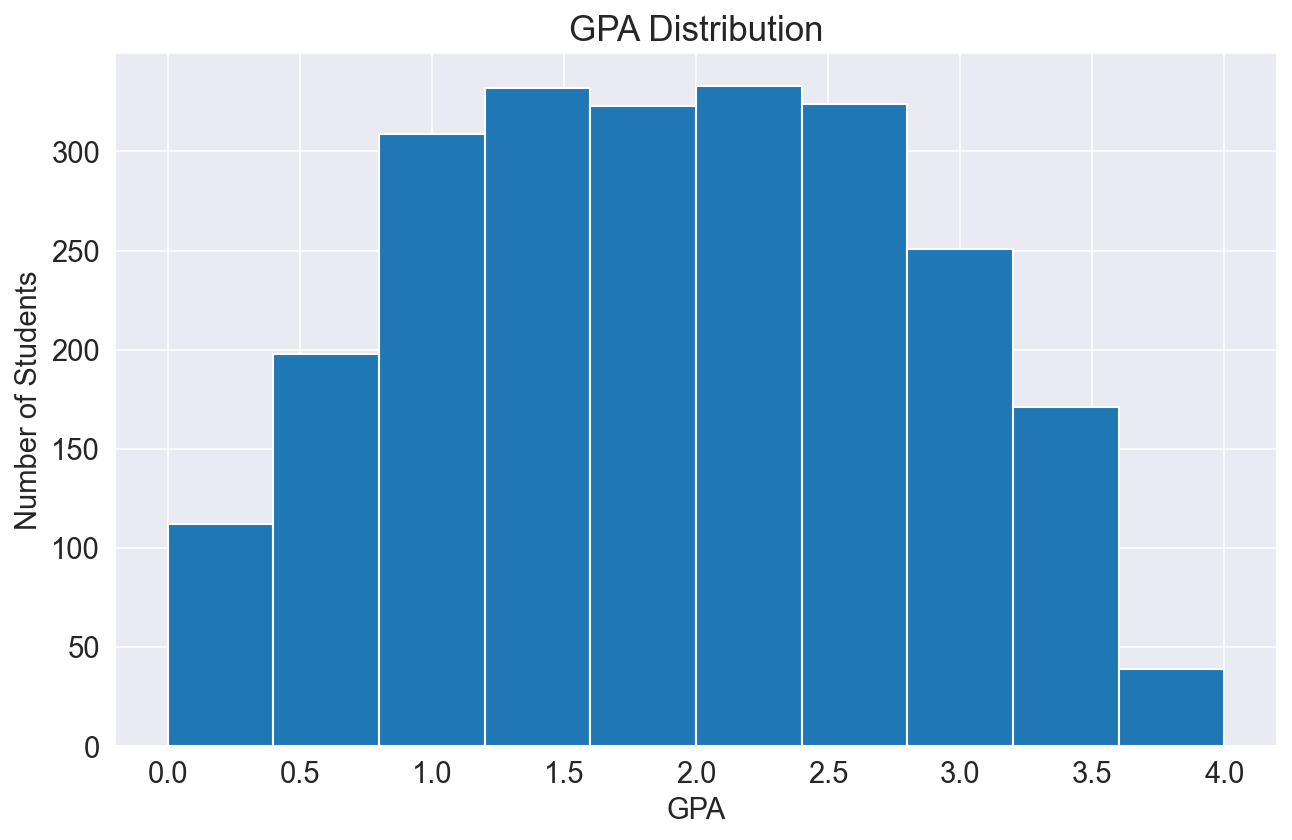

In [80]:
plt.hist(df_std_pfm.GPA)
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('GPA Distribution')
plt.savefig('')
plt.show();

>* The histogram shows that the majority of the students are in the 1.0 to 3.0 GPA range.
>* Mean GPA is 1.91 and standard deviation is 0.915156.

Lets explore study habits: StudyTimeWeekly, Absences and Tutoring. 
We will find correlations between numeric columns: StudyTimeWeekly and Absences, and GPA using scatterplots. Aalyze the distribution of GPA among Tutoring using boxplot.


### Analyzing Study Habits

#### 1. Correlation Between GPA and StudyTimeWeekly

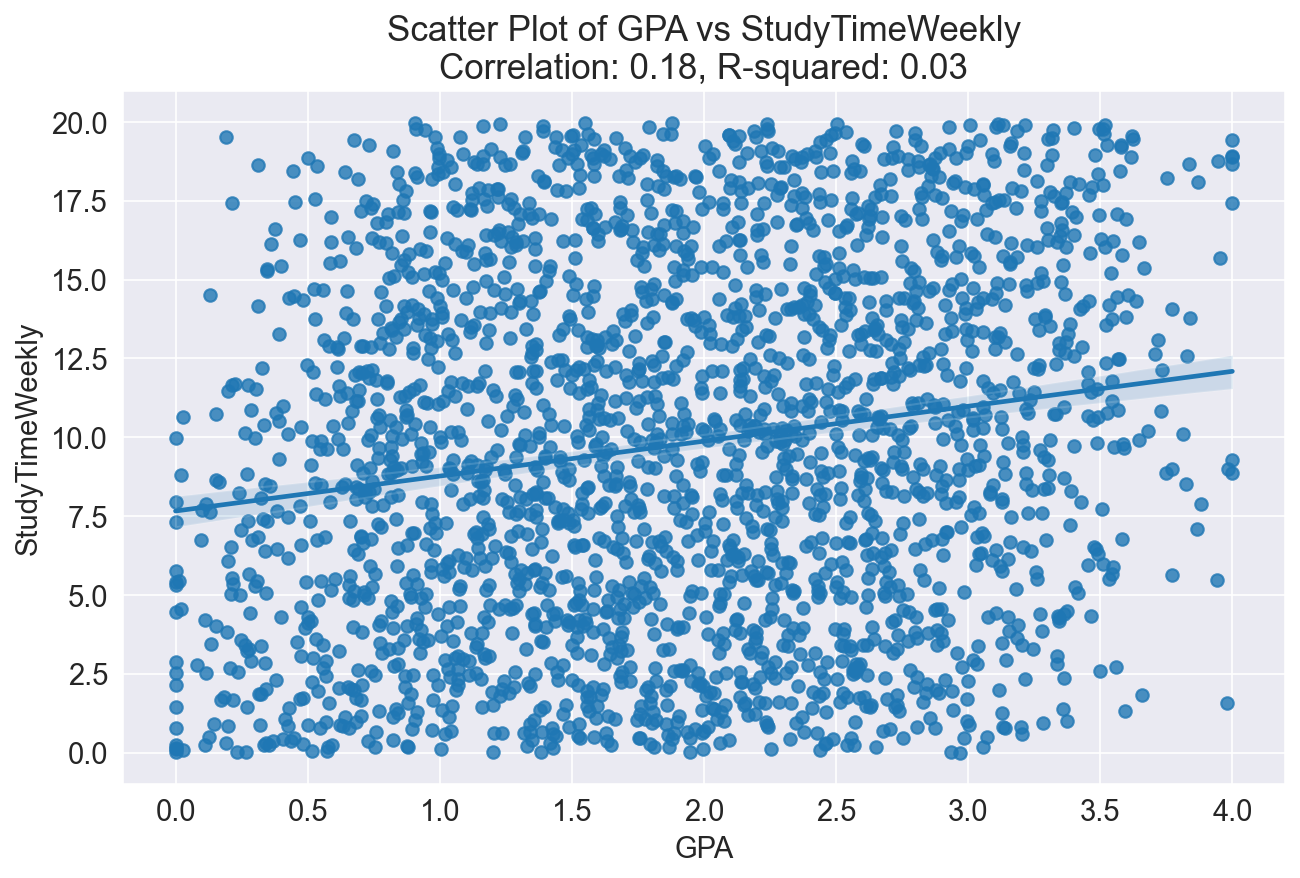

In [81]:
corr, _ = stats.pearsonr(df_std_pfm['GPA'], 
                         df_std_pfm['StudyTimeWeekly'])
r_squared = corr ** 2

sns.regplot(x = df_std_pfm.GPA, 
            y = df_std_pfm.StudyTimeWeekly)

plt.title(f'Scatter Plot of GPA vs StudyTimeWeekly\nCorrelation: {corr:.2f}, R-squared: {r_squared:.2f}');
plt.savefig(output_folder +
            'Scatter Plot of GPA vs StudyTimeWeekly.png', 
            bbox_inches='tight')

> There is a very weak positive correlation of 0.18 between GPA and StudyTimeWeekly. This indicates that while study time has some influence on GPA, it is not a major determining factor. Many other variables likely play a significant role in students' academic performance.

#### 2. Correlation Between GPA and Absences

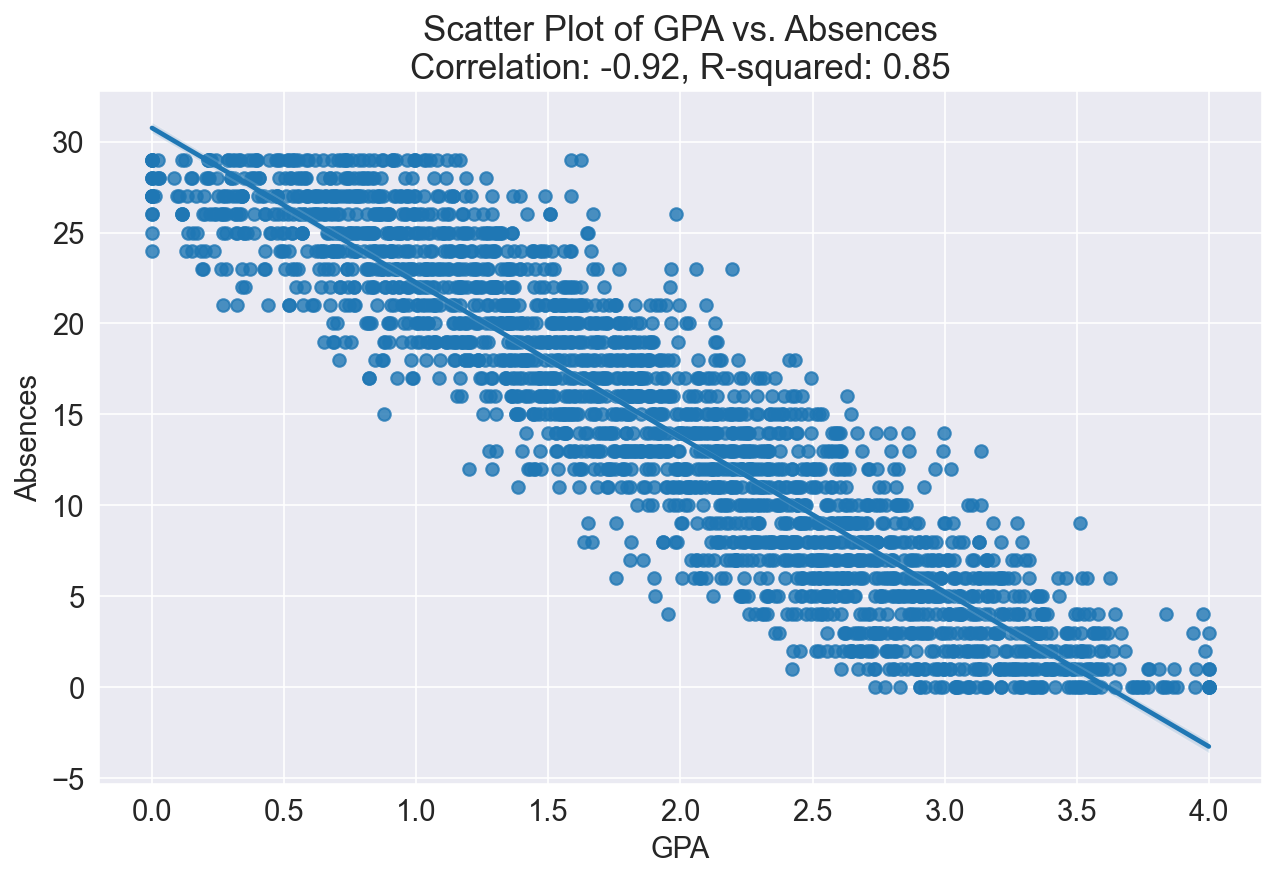

In [82]:
# Calculate correlation coefficient and R-squared value
corr, _ = stats.pearsonr(df_std_pfm['GPA'], df_std_pfm['Absences'])
r_squared = corr ** 2

ax = sns.regplot(x=df_std_pfm.GPA,
                 y=df_std_pfm.Absences) 

plt.title(f'Scatter Plot of GPA vs. Absences\nCorrelation: {corr:.2f}, R-squared: {r_squared:.2f}');
plt.savefig('Scatter Plot of GPA vs. Absences.png')

>There is a very strong negative correlation of -0.92 between GPA and Absences. This indicates that absences from classes significantly impact a student's academic performance.

#### 3. GPA Distribution by Tutoring Status
Note that Tutoring column is a binary variable: 0 means no tutoring received and 1 means tutoring received.

In [83]:
df_std_pfm.groupby('Tutoring')["GPA"].mean()

Tutoring
0    1.818968
1    2.108325
Name: GPA, dtype: float64

>Students who received tutoring (1) tend to have higher GPAs on average than those who did not (0).

##### Five-number Summary

In [84]:
feat_5_num = ['Median', 'Q1', 'Q3', 'IQR', 'Lower Whisker', 'Upper Whisker']

def cal_5_number(var):
    stat_5_num={}
    stat_5_num['Median'] = np.median(var) 
    stat_5_num['Q1']= np.percentile(var, 25) #Q1 is the median of the first half of the data
    stat_5_num['Q3']= np.percentile(var, 75)
    stat_5_num['IQR']= stat_5_num['Q3'] - stat_5_num['Q1']
    stat_5_num['Lower Whisker']= max(min(var), stat_5_num['Q1'] - 1.5 * stat_5_num['IQR'])
    stat_5_num['Upper Whisker']= min(max(var), stat_5_num['Q3'] + 1.5 * stat_5_num['IQR'])
    return stat_5_num

def print_5_number(five_num, title):
    print(f"== {title} ==")
    for feat in feat_5_num:
        print(f"{feat}:", five_num[feat])
    print()

== Tutoring: No ==
Median: 1.8186125604584331
Q1: 1.0720206708895483
Q3: 2.539722493917867
IQR: 1.4677018230283185
Lower Whisker: 0.0
Upper Whisker: 4.0

== Tutoring: Yes ==
Median: 2.0956913654305778
Q1: 1.3711850388917164
Q3: 2.864498066852598
IQR: 1.4933130279608815
Lower Whisker: 0.0
Upper Whisker: 4.0



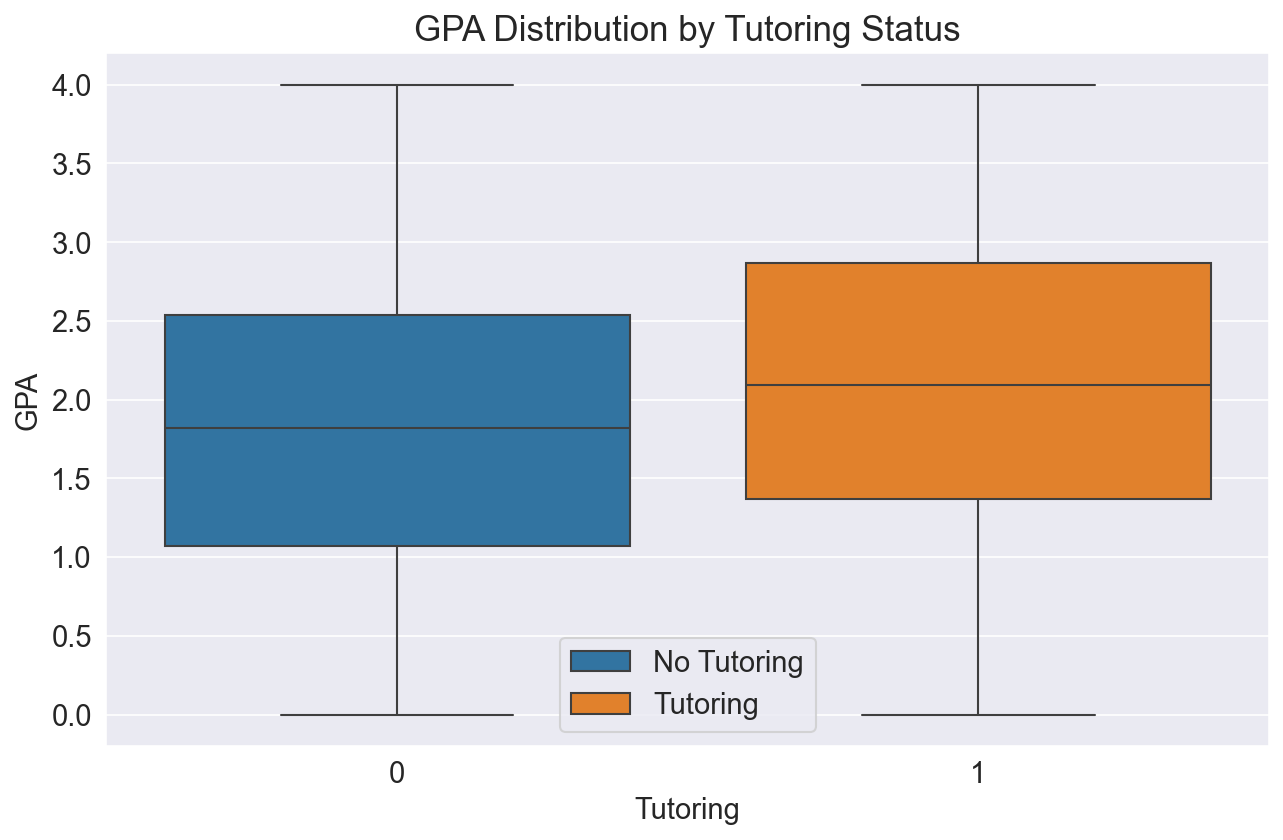

In [85]:
    
num5_no_tutoring = cal_5_number(
    df_std_pfm[df_std_pfm["Tutoring"]==0]["GPA"])

num5_tutoring = cal_5_number(
    df_std_pfm[df_std_pfm["Tutoring"]==1]["GPA"])

print_5_number(num5_no_tutoring,"Tutoring: No")
print_5_number(num5_tutoring,"Tutoring: Yes")

# plt.figure(figsize=(4,3))
sns.boxplot(x='Tutoring', y='GPA', data=df_std_pfm, hue="Tutoring")
plt.legend(["No Tutoring","Tutoring"],loc="lower center")#,fontsize=8)
# plt.legend(
#     title='Tutoring',
#     loc='lower center',
#     bbox_to_anchor=(0.5, 0.05),
#     frameon=True
# )

plt.title("GPA Distribution by Tutoring Status")
plt.savefig('GPA Distribution by Tutoring Status.png')

>From your boxplot output, it looks like students who received tutoring generally performed better on average:
>- The median GPA for tutored students is about 2.10, compared to 1.82 for those without tutoring.
>- The entire distribution is shifted upward, with higher Q1 and Q3 values for the tutored group.
>- Both groups have the same lower and upper whiskers, indicating they share the same GPA extremes (0.0 to 4.0), but the central 50% of the tutored group is clearly stronger.

### Analyzing Extracurricular Activities
Compare the Average GPA for Different Categories of Binary Variables

In [86]:
binary_vars = ['Extracurricular', 'Sports', 'Music', 'Volunteering']

for var in binary_vars:
    mean = df_std_pfm.groupby(var)['GPA'].mean()
    print(f'{var} mean:')
    print(f'{mean.index[0]}: {mean[0]}')
    print(f'{mean.index[1]}: {mean[1]}')
    print(f'Mean difference: {mean[1]-mean[0]}')
    print()

Extracurricular mean:
0: 1.8383155830380276
1: 2.0153567624218045
Mean difference: 0.17704117938377695

Sports mean:
0: 1.871239565439244
1: 1.9863808816805857
Mean difference: 0.11514131624134172

Music mean:
0: 1.872969212784584
1: 2.0416640729568982
Mean difference: 0.16869486017231416

Volunteering mean:
0: 1.9048989649017978
1: 1.9130886246804826
Mean difference: 0.008189659778684799



In [87]:
for var in binary_vars:
    num5_no_tutoring = cal_5_number(
        df_std_pfm[df_std_pfm[var]==0]["GPA"])

    num5_tutoring = cal_5_number(
        df_std_pfm[df_std_pfm[var]==1]["GPA"])
    
    print_5_number(num5_no_tutoring,f"{var}: No")
    print_5_number(num5_tutoring,f"{var}: Yes")

== Extracurricular: No ==
Median: 1.8347494481922708
Q1: 1.1063066836746147
Q3: 2.5447628663405486
IQR: 1.438456182665934
Lower Whisker: 0.0
Upper Whisker: 4.0

== Extracurricular: Yes ==
Median: 2.009298479722319
Q1: 1.2836220775478306
Q3: 2.7192011567406125
IQR: 1.4355790791927818
Lower Whisker: 0.0
Upper Whisker: 4.0

== Sports: No ==
Median: 1.8784058449871115
Q1: 1.123979042428345
Q3: 2.618097845074108
IQR: 1.4941188026457632
Lower Whisker: 0.0
Upper Whisker: 4.0

== Sports: Yes ==
Median: 1.9488167865943389
Q1: 1.2858837071511262
Q3: 2.631058857299295
IQR: 1.3451751501481688
Lower Whisker: 0.0
Upper Whisker: 4.0

== Music: No ==
Median: 1.8714659014427095
Q1: 1.1466960797952552
Q3: 2.5896707308558047
IQR: 1.4429746510605495
Lower Whisker: 0.0
Upper Whisker: 4.0

== Music: Yes ==
Median: 1.9922988471433196
Q1: 1.2962034059148804
Q3: 2.8029469338939803
IQR: 1.5067435279791
Lower Whisker: 0.0
Upper Whisker: 4.0

== Volunteering: No ==
Median: 1.894172625941011
Q1: 1.1697239118132146

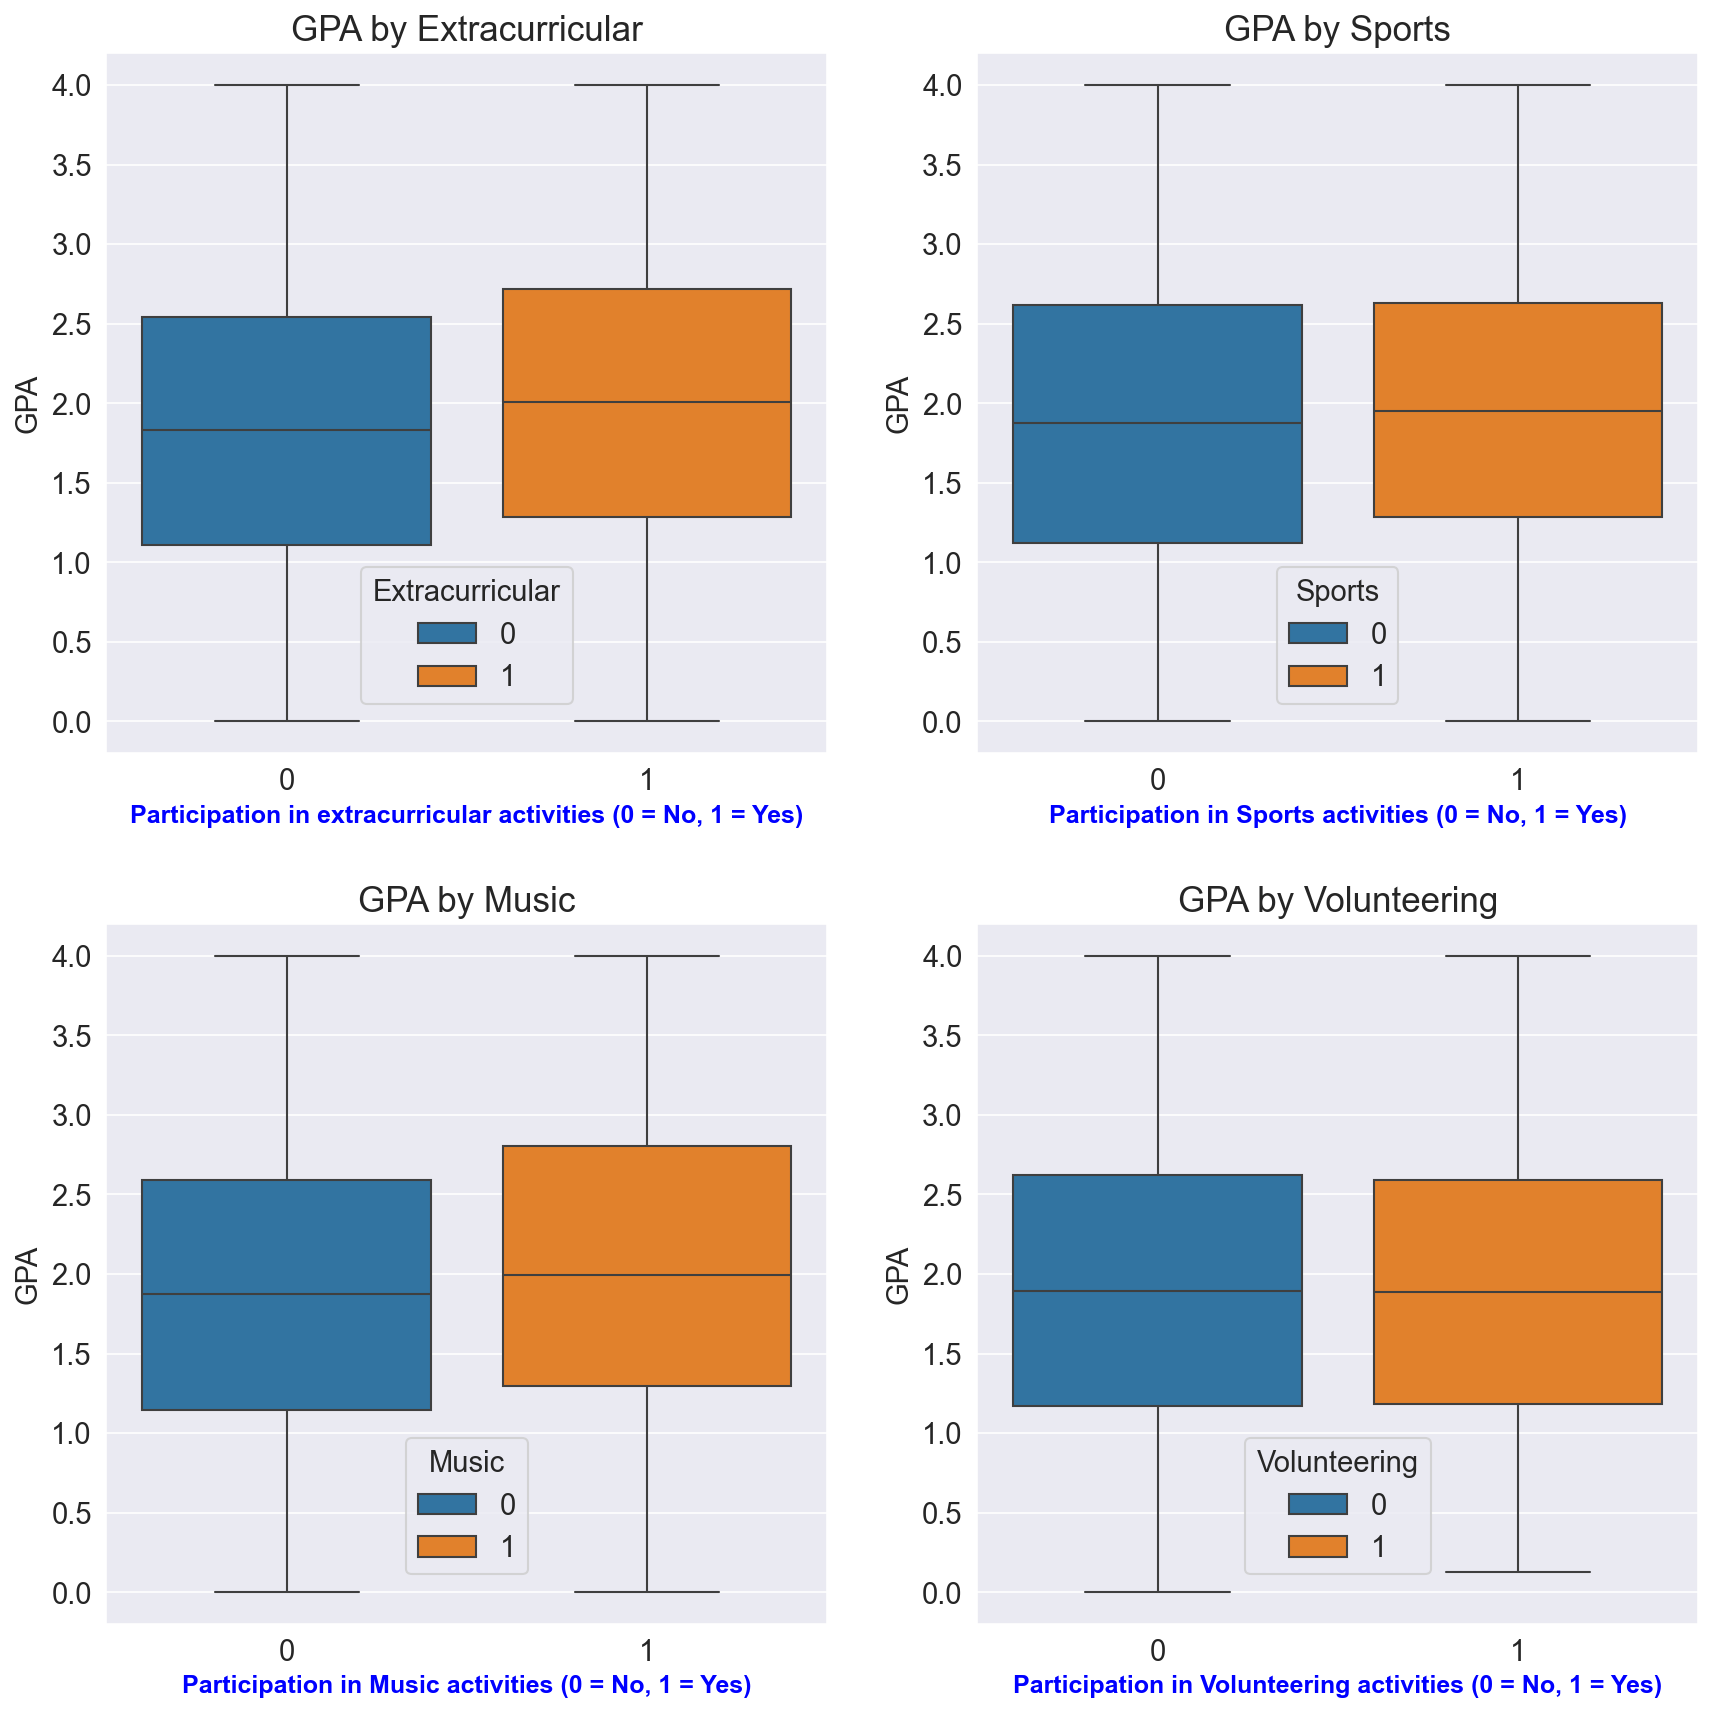

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(x='Extracurricular', y='GPA', data=df_std_pfm, hue="Extracurricular",ax = axs[0,0])
axs[0, 0].set_title('GPA by Extracurricular')
axs[0, 0].set_xlabel('Participation in extracurricular activities (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')
axs[0, 0].legend(
    title='Extracurricular',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.05),
    ncol=1,
    frameon=True
)
sns.boxplot(x='Sports', y='GPA', data=df_std_pfm, hue="Sports",ax = axs[0,1])
axs[0, 1].set_title('GPA by Sports')
axs[0, 1].set_xlabel('Participation in Sports activities (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')
axs[0, 1].legend(
    title='Sports',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.05),
    ncol=1,
    frameon=True
)
sns.boxplot(x='Music', y='GPA', data=df_std_pfm, hue="Music",ax = axs[1,0])
axs[1, 0].set_title('GPA by Music')
axs[1, 0].set_xlabel('Participation in Music activities (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')
axs[1, 0].legend(
    title='Music',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.05),
    ncol=1,
    frameon=True
)
sns.boxplot(x='Volunteering', y='GPA', data=df_std_pfm, hue="Volunteering",ax = axs[1,1])
axs[1, 1].set_title('GPA by Volunteering')
axs[1, 1].set_xlabel('Participation in Volunteering activities (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')
axs[1, 1].legend(
    title='Volunteering',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.05),
    ncol=1,
    frameon=True
)

plt.tight_layout(pad=2.0)
plt.savefig('boxplots_extra_act.png')
plt.show()

 1. Medians (central tendency)
Across all activities, students who participated tend to have slightly higher GPA medians than those who didn’t:
- Extracurricular: 2.01 vs 1.83
- Sports: 1.95 vs 1.88
- Music: 1.99 vs 1.87
- Volunteering: Slightly lower for “Yes” (1.89 vs 1.89)—a negligible difference
This suggests a subtle academic boost for students who engage in these activities—especially Music and Extracurriculars.

📦 2. IQR (Interquartile Range) – Spread of the middle 50%
The IQRs are quite consistent across groups (around 1.4–1.5), meaning GPA variation is fairly stable regardless of participation. The spread doesn’t dramatically widen or narrow, so participation doesn’t seem to introduce more variability.

🪃 3. Whiskers – Outliers and extremes
All upper whiskers hit the ceiling at 4.0, so there’s a cluster of high-performing students in every group.
However, only Volunteering: Yes has a non-zero lower whisker (0.13), suggesting slightly fewer extreme low values than others.
m

>Tutoring appears to have the most significant positive impact on GPA, followed by extracurricular activities, music, and sports. Gender and volunteering show very minimal differences in GPA.

### Analyzing Demographic Details
#### Ethnicity
##### Population Distribution of Students by Ethnicity and Grade Class

In [89]:
df=df_std_pfm.groupby('Ethnicity')[['GradeClass']].value_counts().reset_index(name='count')
df=df.pivot(index='GradeClass',columns='Ethnicity',values='count')

df.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
df.rename(columns={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
df_T= df.T
# print(df)
# print("*******")
# print(df_T)

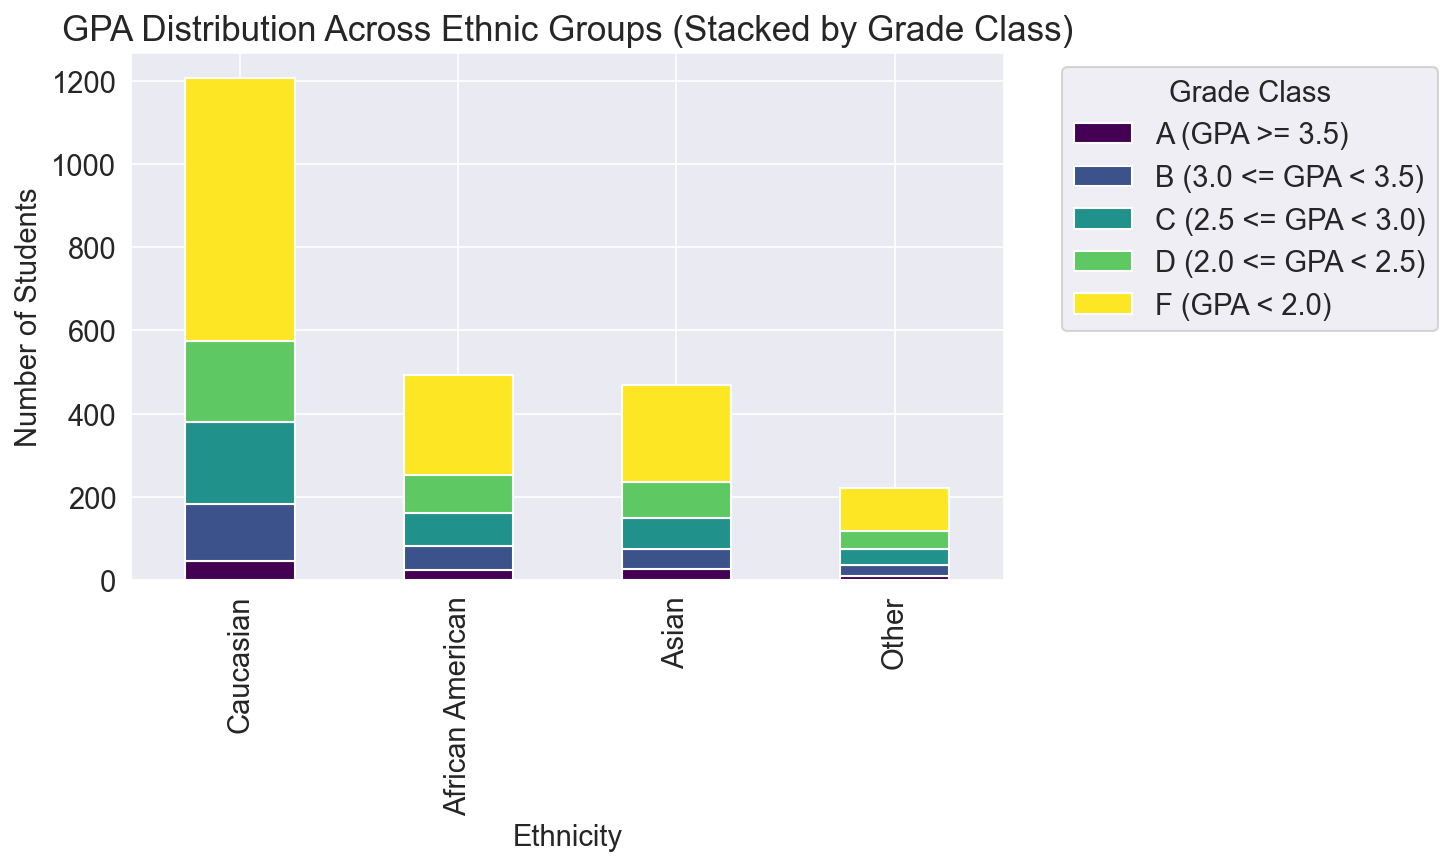

In [90]:
# Transpose to group by ethnicity on the x-axis
df_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("GPA Distribution Across Ethnic Groups (Stacked by Grade Class)")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

>This distribution highlights that Caucasian students are the largest group in this dataset followed by African American, Asian and Other. Only a small portion of each ethnicity achieved high GradeClass standings.

##### Percentage Distribution of Ethnicities Across Grade Classes

Asian
Caucasian


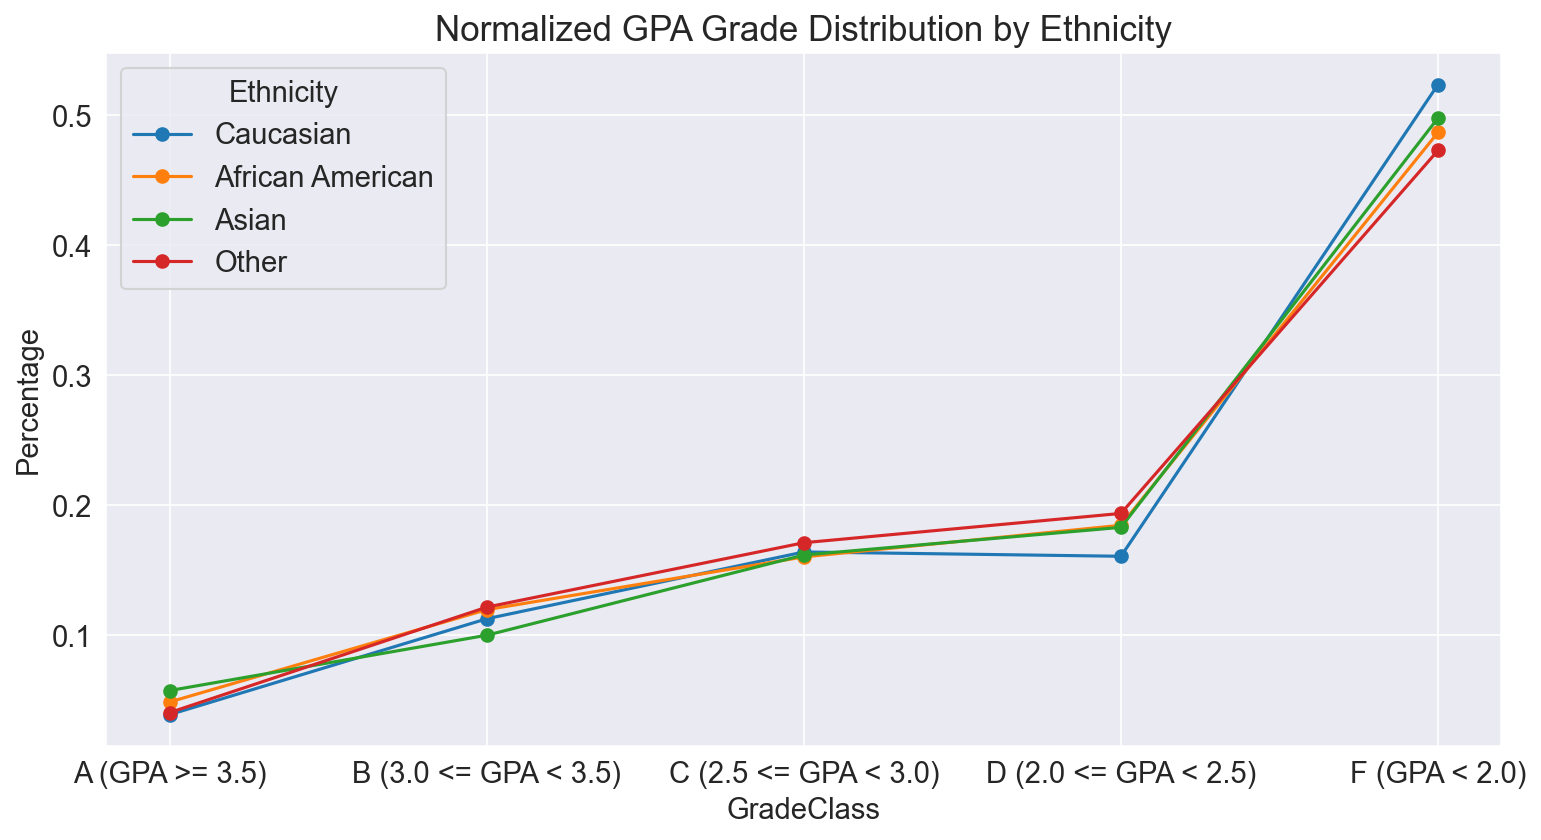

In [91]:
df_normalized = df_T.div(df_T.sum(axis=1), axis=0)
# print(df_normalized)
print(df_normalized['A (GPA >= 3.5)'].idxmax())
print(df_normalized['A (GPA >= 3.5)'].idxmin())
plt.figure(figsize=(12, 6))

for ethnicity in df_normalized.index:
    plt.plot(df_normalized.columns, df_normalized.loc[ethnicity],
             marker='o', label=ethnicity)

plt.title("Normalized GPA Grade Distribution by Ethnicity")
plt.xlabel('GradeClass')
plt.ylabel('Percentage')
plt.legend(title='Ethnicity')
plt.savefig('Percentage Distribution of Ethnicities Across Grade Classes.png')
plt.show()


>A relatively small percentage of students from all ethnic groups achieve a GPA of 3.5 or higher, with Asian students having the highest representation in this category while Causacasian the lowest. For GPA of 2.0 or lower, Causacasian represent the highest and the Other class the lowest.
>
In the normalized line chart, each line represents one ethnic group, and that line adds up to 100% of the students within that group.
For example, if you look at the "Asian" line:
- The percentage at each GPA grade class (A, B, C, D, F) reflects how many Asian students fall into each GPA bracket, relative to the total number of Asian students.
#### Gender

In [92]:
mean = df_std_pfm.groupby('Gender')['GPA'].mean()
print(mean)
print(mean[0]-mean[1])
gender_male = cal_5_number(
    df_std_pfm[df_std_pfm['Gender']==0]["GPA"])
gender_female = cal_5_number(
    df_std_pfm[df_std_pfm['Gender']==1]["GPA"])
print_5_number(gender_male,f"Male")
print_5_number(gender_female,f"Female")

Gender
0    1.918679
1    1.894225
Name: GPA, dtype: float64
0.02445358464121683
== Male ==
Median: 1.9200061462885518
Q1: 1.16874207133128
Q3: 2.631058857299295
IQR: 1.462316785968015
Lower Whisker: 0.0
Upper Whisker: 4.0

== Female ==
Median: 1.8762109790188561
Q1: 1.1771176269571921
Q3: 2.6125192642762123
IQR: 1.4354016373190202
Lower Whisker: 0.0
Upper Whisker: 4.0



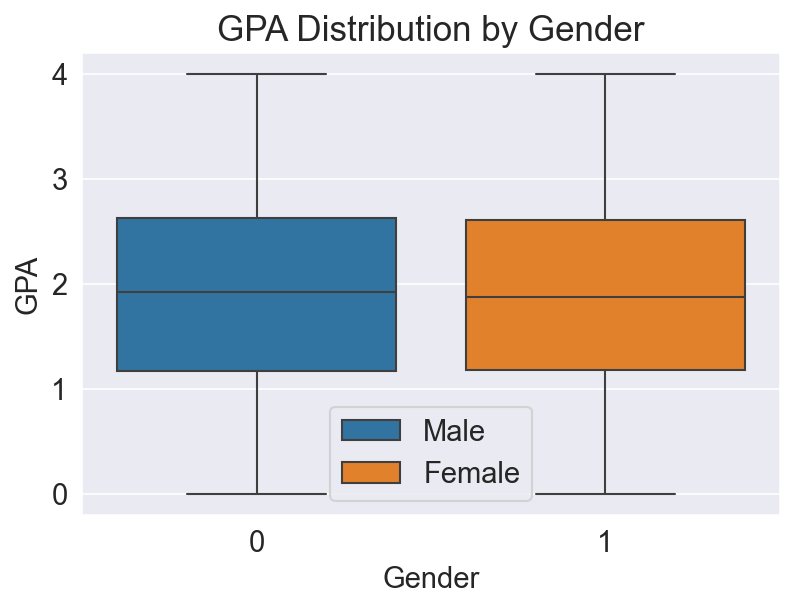

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='GPA', 
            hue="Gender", data = df_std_pfm, )
plt.legend(['Male','Female'],  loc='lower center')
plt.title("GPA Distribution by Gender")
plt.savefig(output_folder+"GPA Distribution by Gender.png")

#### Age
##### GPA Grade Distributions Acroess Age Groups

In [94]:
x_tck_lbl={
    'ParentalEducation':['None','High School','Some College', 'Bachelor\'s','Higher' ],
    'ParentalSupport':['None','low','Moderate', 'High','Very High' ],
    'Gender': ['Male','Female']
}

Text(0.5, 1.0, 'GPA by Age')

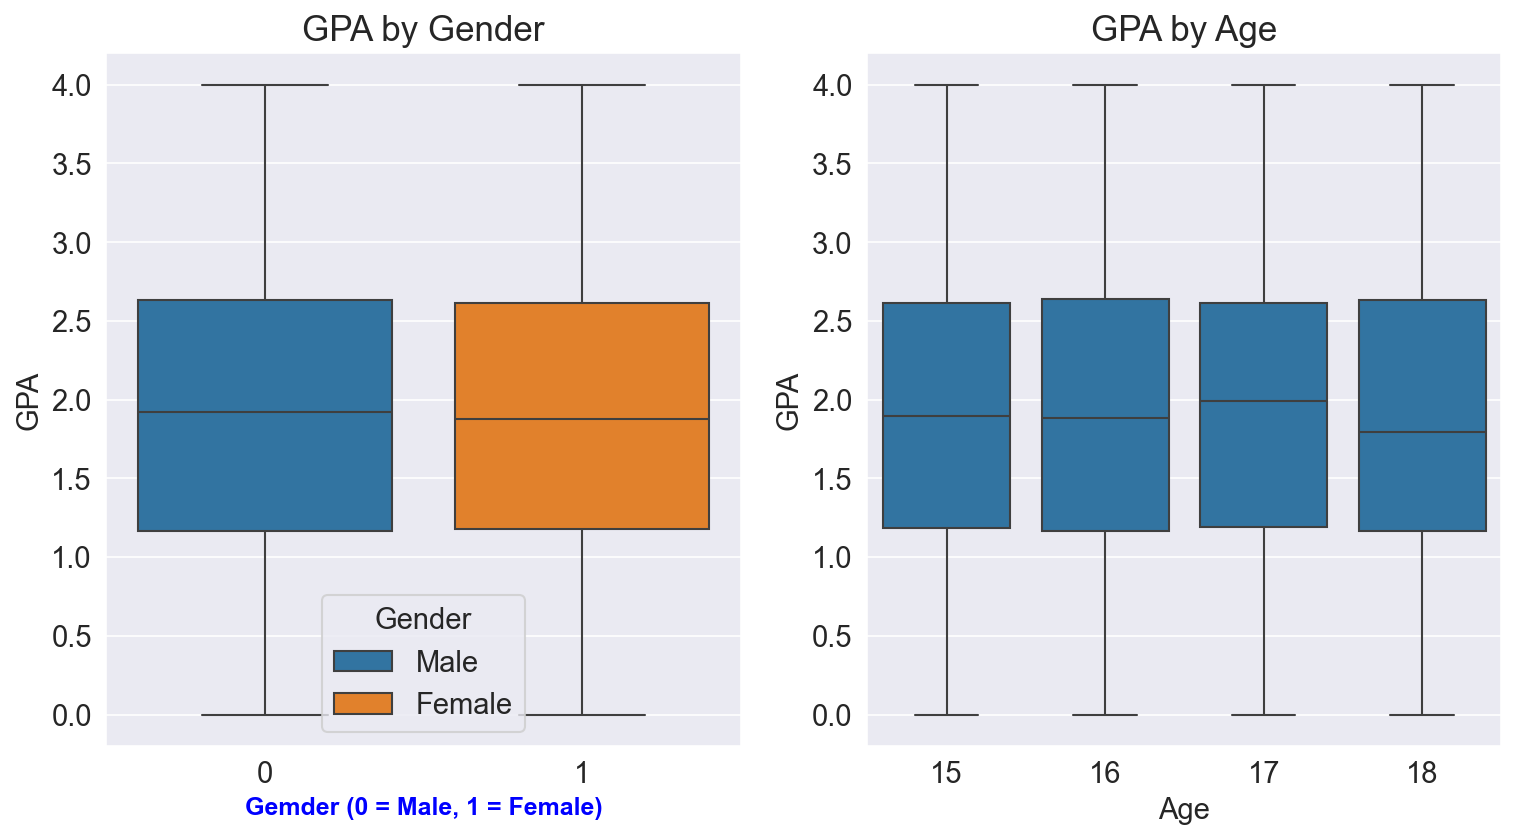

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Gender', y='GPA', data = df_std_pfm, 
            hue="Gender",ax = axs[0])
axs[0].set_title('GPA by Gender')
axs[0].set_xlabel('Gender (0 = Male, 1 = Female)', 
                     fontsize=12, fontweight='bold', 
                     color='blue')
axs[0].legend(['Male','Female'],title='Gender',loc='lower center',
    # bbox_to_anchor=(0.5, 0.05),
    # ncol=1,
    # frameon=True
)
sns.boxplot(x='Age', y='GPA', data=df_std_pfm, 
            ax = axs[1])
axs[1].set_title('GPA by Age')
# axs[0, 1].set_xlabel('Age', fontsize=12, fontweight='bold', color='blue')
# axs[ 1].legend(
#     title='Sports',
#     loc='lower center',
#     bbox_to_anchor=(0.5, 0.05),
#     ncol=1,
#     frameon=True
# )

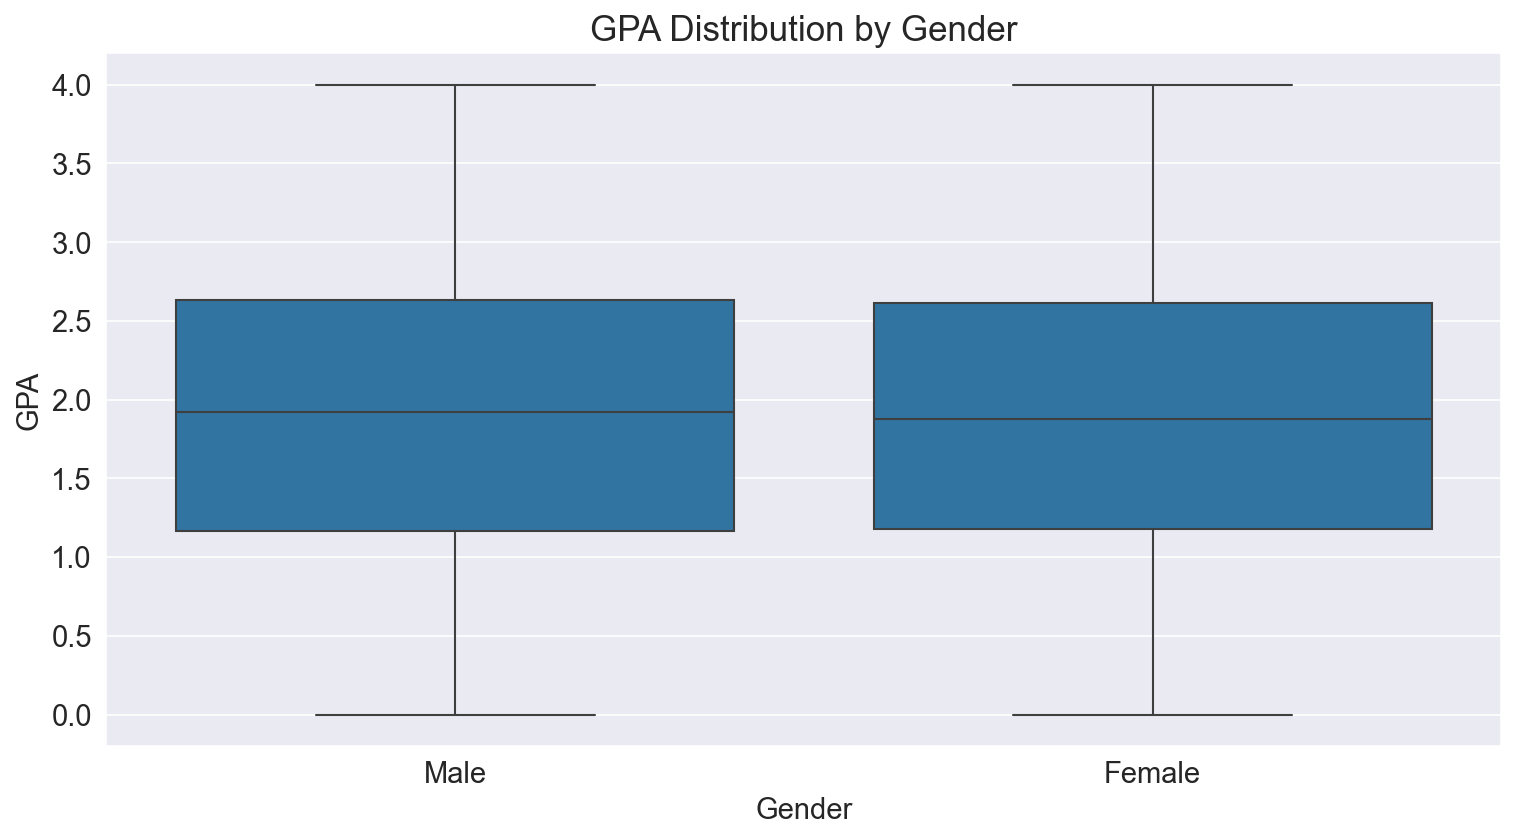

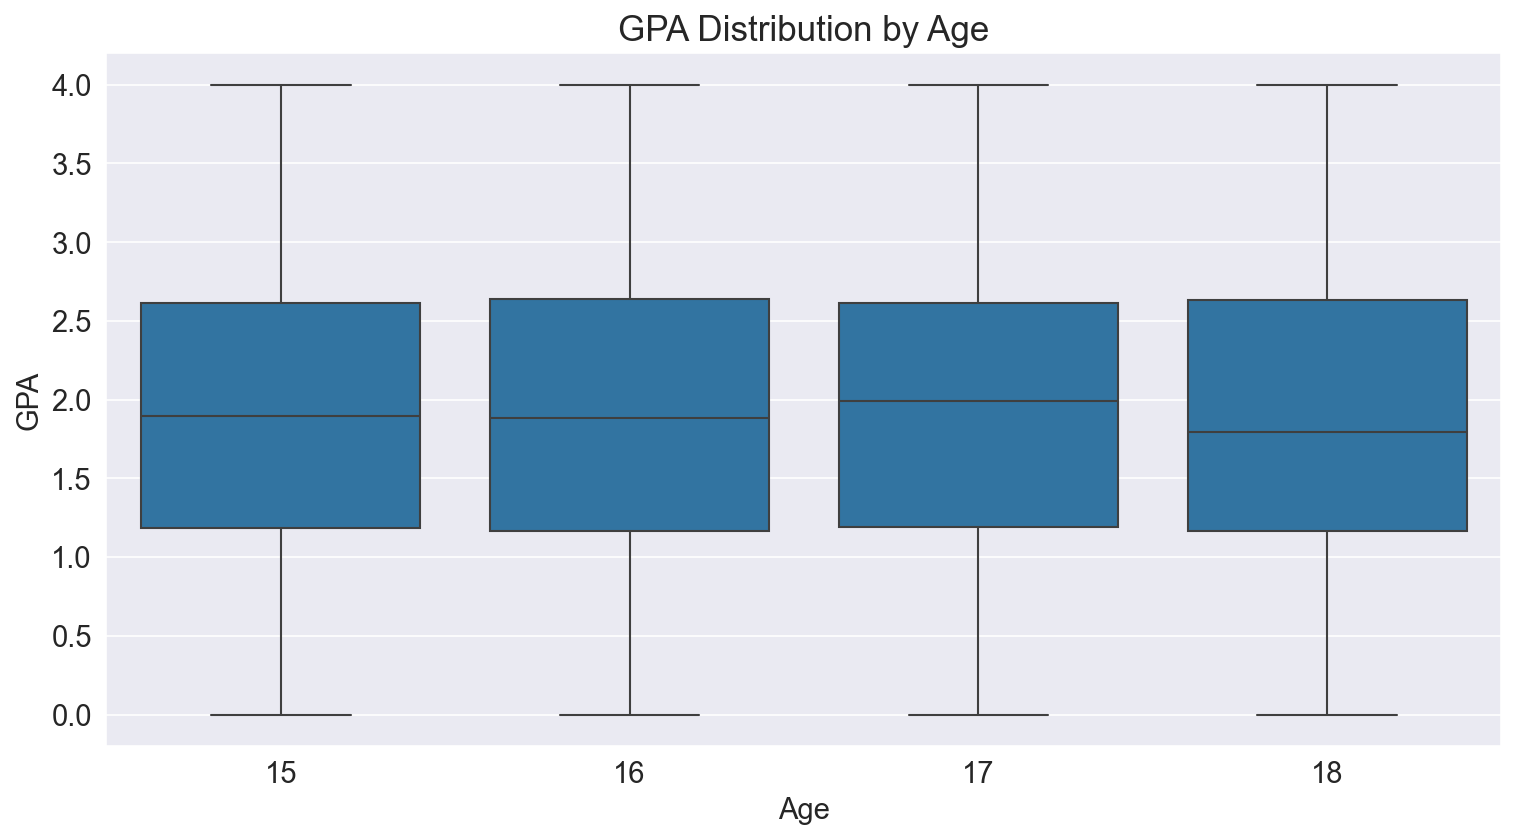

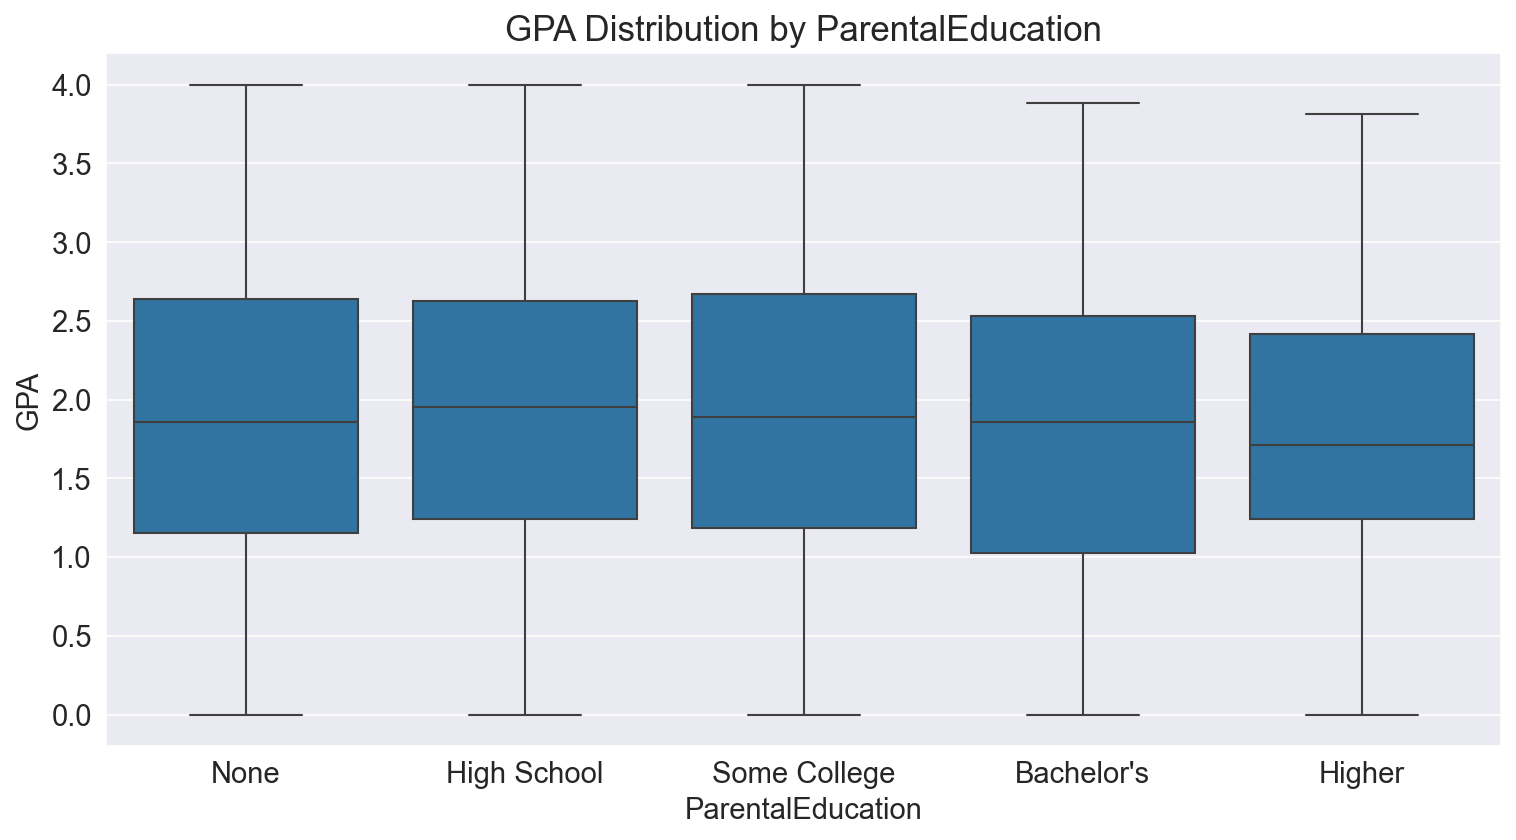

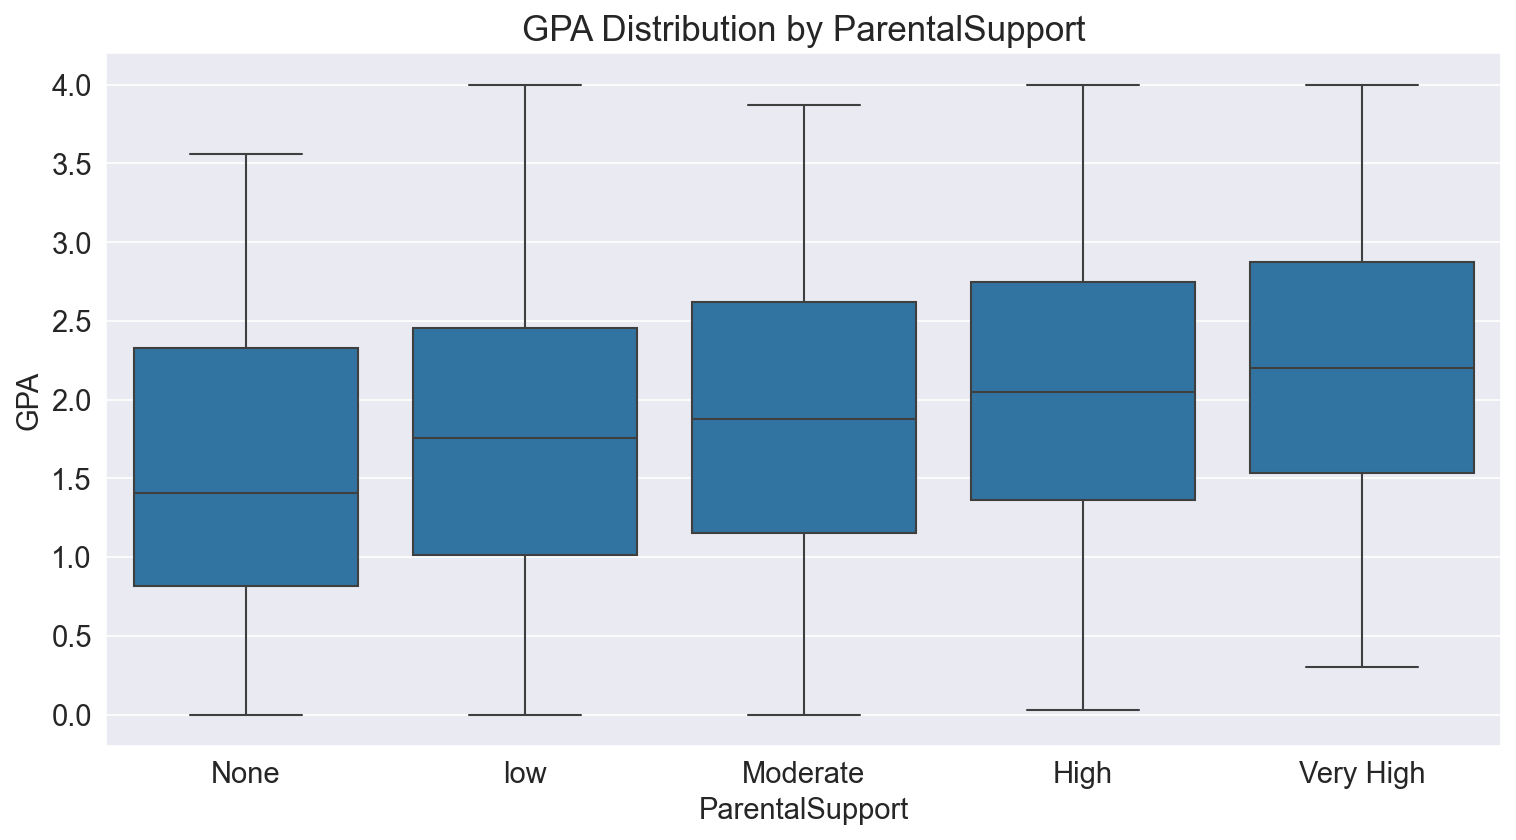

In [96]:
for col in df_std_pfm[['Gender','Age', 'ParentalEducation', 'ParentalSupport']]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df_std_pfm[col], y=df_std_pfm['GPA'])
    plt.title(f'GPA Distribution by {col}')
    plt.xlabel(col)
    
    # Custom x-axis labels
    if col != 'Age': 
        plt.gca().set_xticks(range(len(x_tck_lbl[col]))) 
        plt.gca().set_xticklabels(x_tck_lbl[col]) 

    plt.ylabel('GPA')
    plt.savefig(f'GPA Distribution by {col}.png')
    plt.show()
    

In [97]:
df_age_agg=df_std_pfm.groupby('Age')[['GradeClass']].value_counts().reset_index(name='count')
df_age_agg=df_age_agg.pivot(index='GradeClass',columns='Age',values='count')
# print(df_age_agg)
print(df_age_agg.columns)
df_age_agg.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
# df.rename(columns={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
df_age_agg_T= df_age_agg.T
# print(df)
# print("*******")
# print(df_age_agg_T)

Index([15, 16, 17, 18], dtype='int64', name='Age')


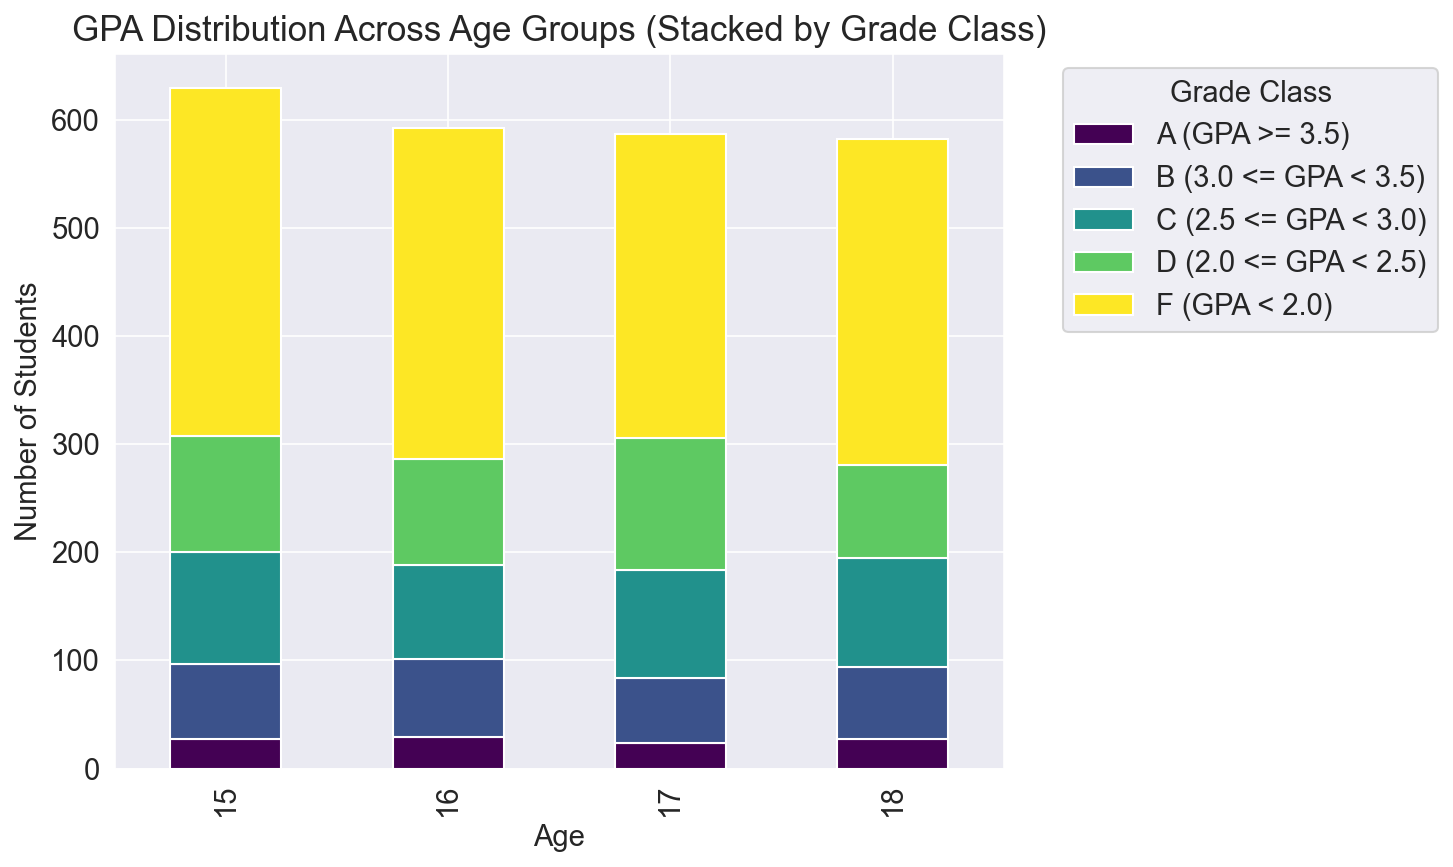

In [98]:
# Transpose to group by ethnicity on the x-axis
df_age_agg_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
# print(df_age_agg_T)
plt.title("GPA Distribution Across Age Groups (Stacked by Grade Class)")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

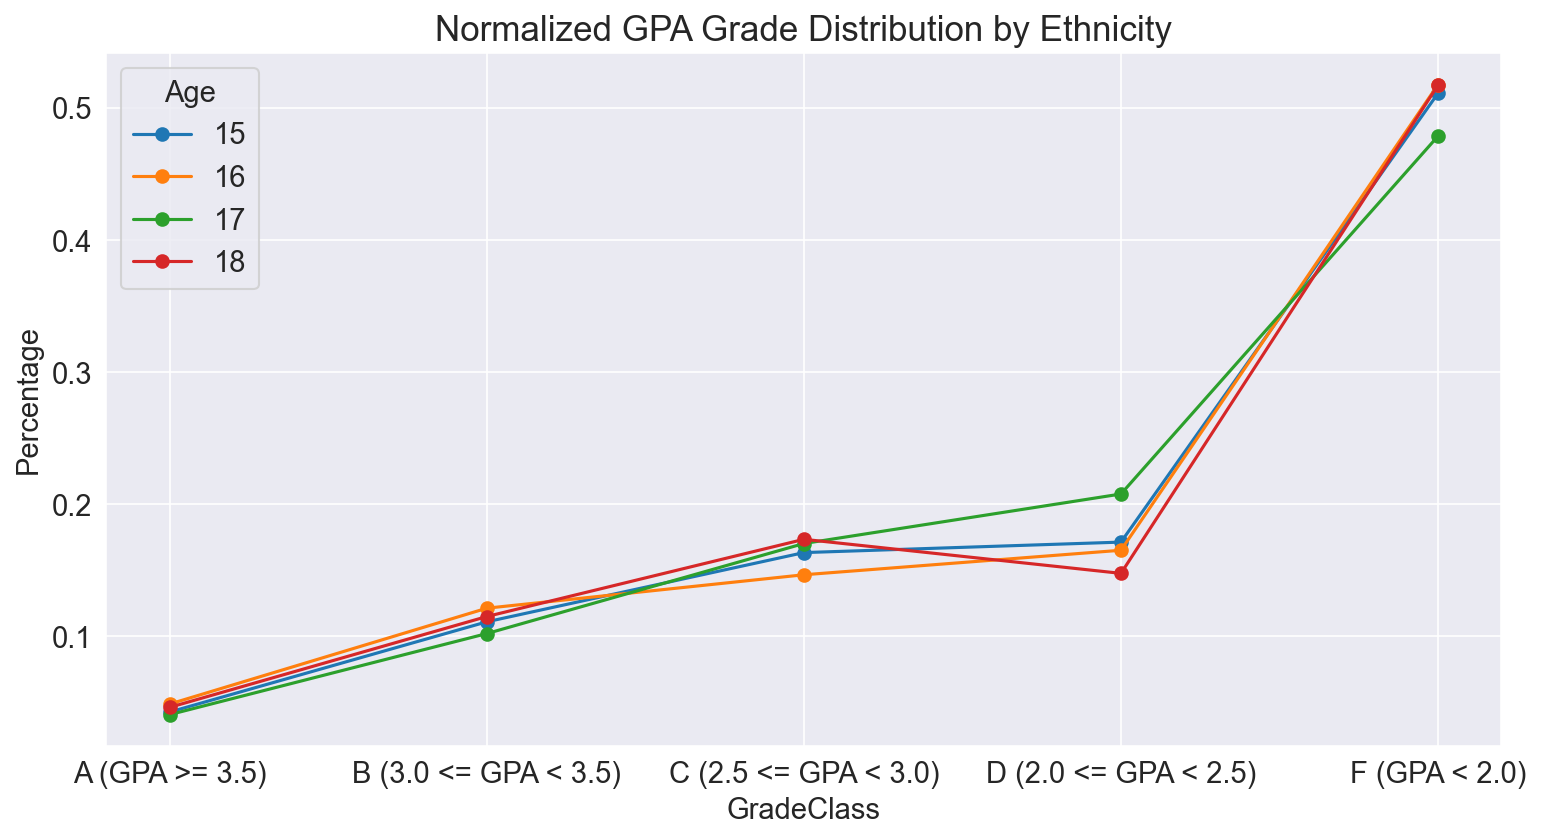

In [99]:
df_age_normalized = df_age_agg_T.div(df_age_agg_T.sum(axis=1), axis=0)
# print(df_age_normalized)
# print(df_normalized['A (GPA >= 3.5)'].idxmax())
# print(df_normalized['A (GPA >= 3.5)'].idxmin())
plt.figure(figsize=(12, 6))

for i in df_age_normalized.index:
    plt.plot(df_age_normalized.columns, df_age_normalized.loc[i],
             marker='o', label=i)

plt.title("Normalized GPA Grade Distribution by Ethnicity")
plt.xlabel('GradeClass')
plt.ylabel('Percentage')
plt.legend(title='Age')
plt.savefig('Percentage Distribution of Ethnicities Across Grade Classes.png')
plt.show()


#### Parental Education Level 
##### and

In [100]:
df_pe_agg=df_std_pfm.groupby('ParentalEducation')[['GradeClass']].value_counts().reset_index(name='count')
df_pe_agg=df_pe_agg.pivot(index='GradeClass',columns='ParentalEducation',values='count')
df_pe_agg.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
# df_pe_agg.rename(columns={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
df_pe_agg_T= df_pe_agg.T


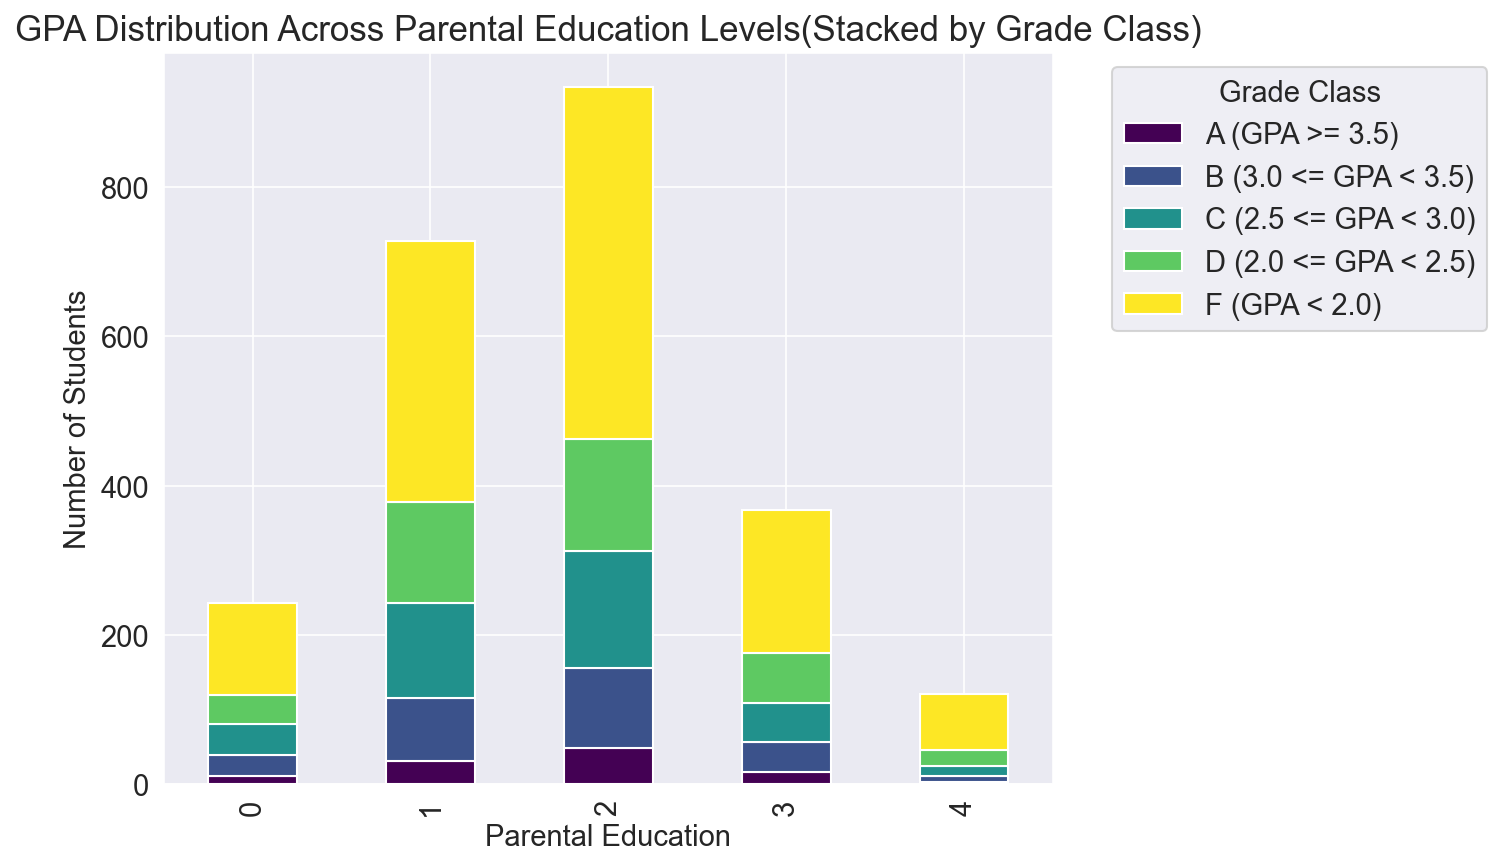

In [101]:
# Transpose to group by ethnicity on the x-axis
df_pe_agg_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("GPA Distribution Across Parental Education Levels(Stacked by Grade Class)")
plt.xlabel("Parental Education")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

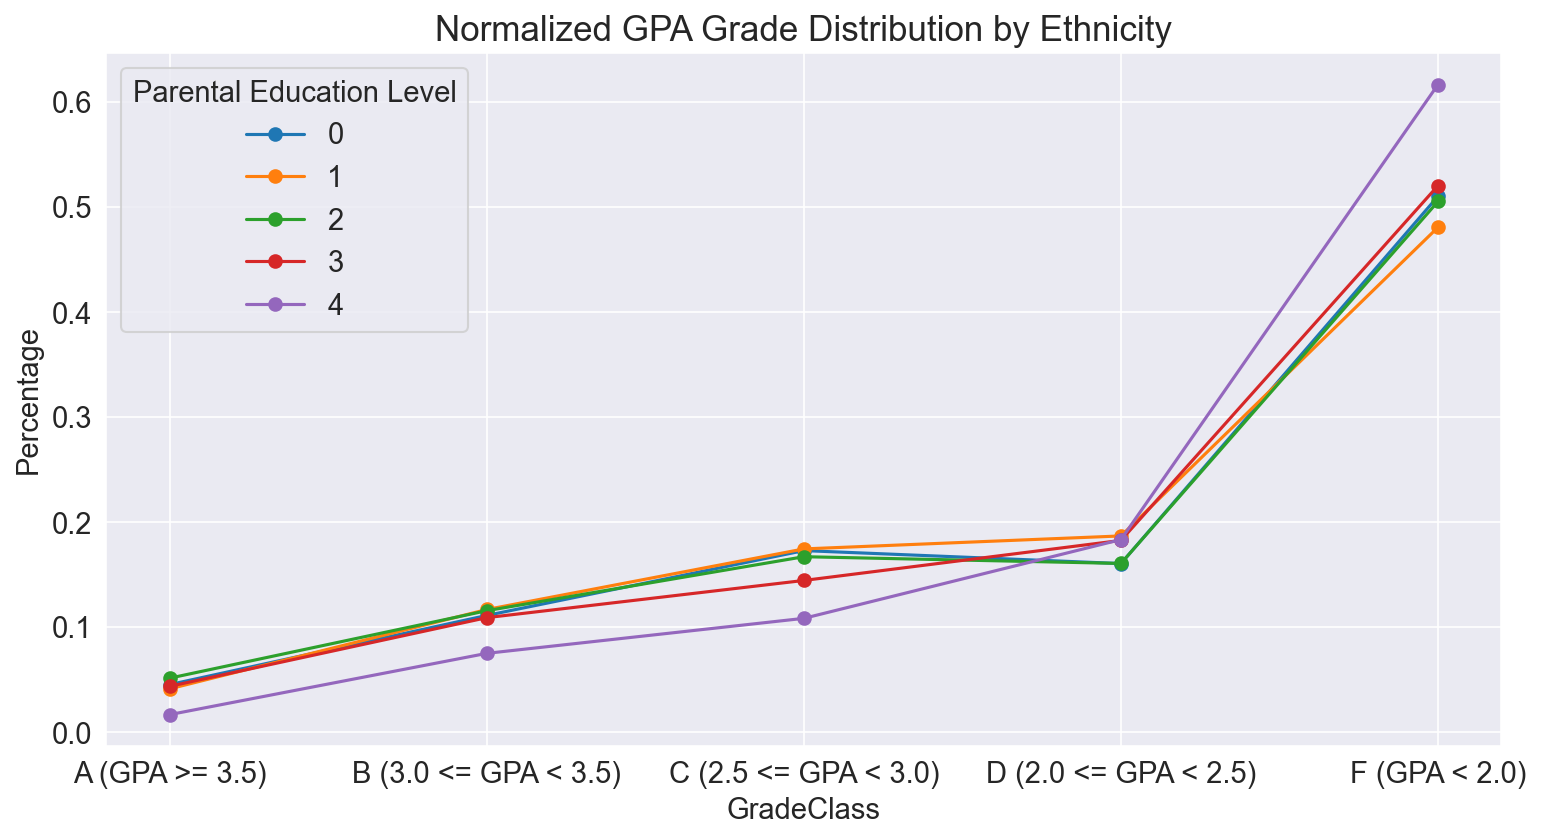

In [102]:
df_pe_normalized = df_pe_agg_T.div(df_pe_agg_T.sum(axis=1), axis=0)
# print(df_age_normalized)
# print(df_normalized['A (GPA >= 3.5)'].idxmax())
# print(df_normalized['A (GPA >= 3.5)'].idxmin())
plt.figure(figsize=(12, 6))

for i in df_pe_normalized.index:
    plt.plot(df_pe_normalized.columns, df_pe_normalized.loc[i],
             marker='o', label=i)

plt.title("Normalized GPA Grade Distribution by Ethnicity")
plt.xlabel('GradeClass')
plt.ylabel('Percentage')
plt.legend(title='Parental Education Level')
plt.savefig('Percentage Distribution of Ethnicities Across Grade Classes.png')
plt.show()


### Analyzing  Parental Involvement

In [103]:
df_pe_agg=df_std_pfm.groupby('ParentalSupport')[['GradeClass']].value_counts().reset_index(name='count')
df_pe_agg=df_pe_agg.pivot(index='GradeClass',columns='ParentalSupport',values='count')
df_pe_agg.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
# df_pe_agg.rename(columns={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
df_pe_agg_T= df_pe_agg.T


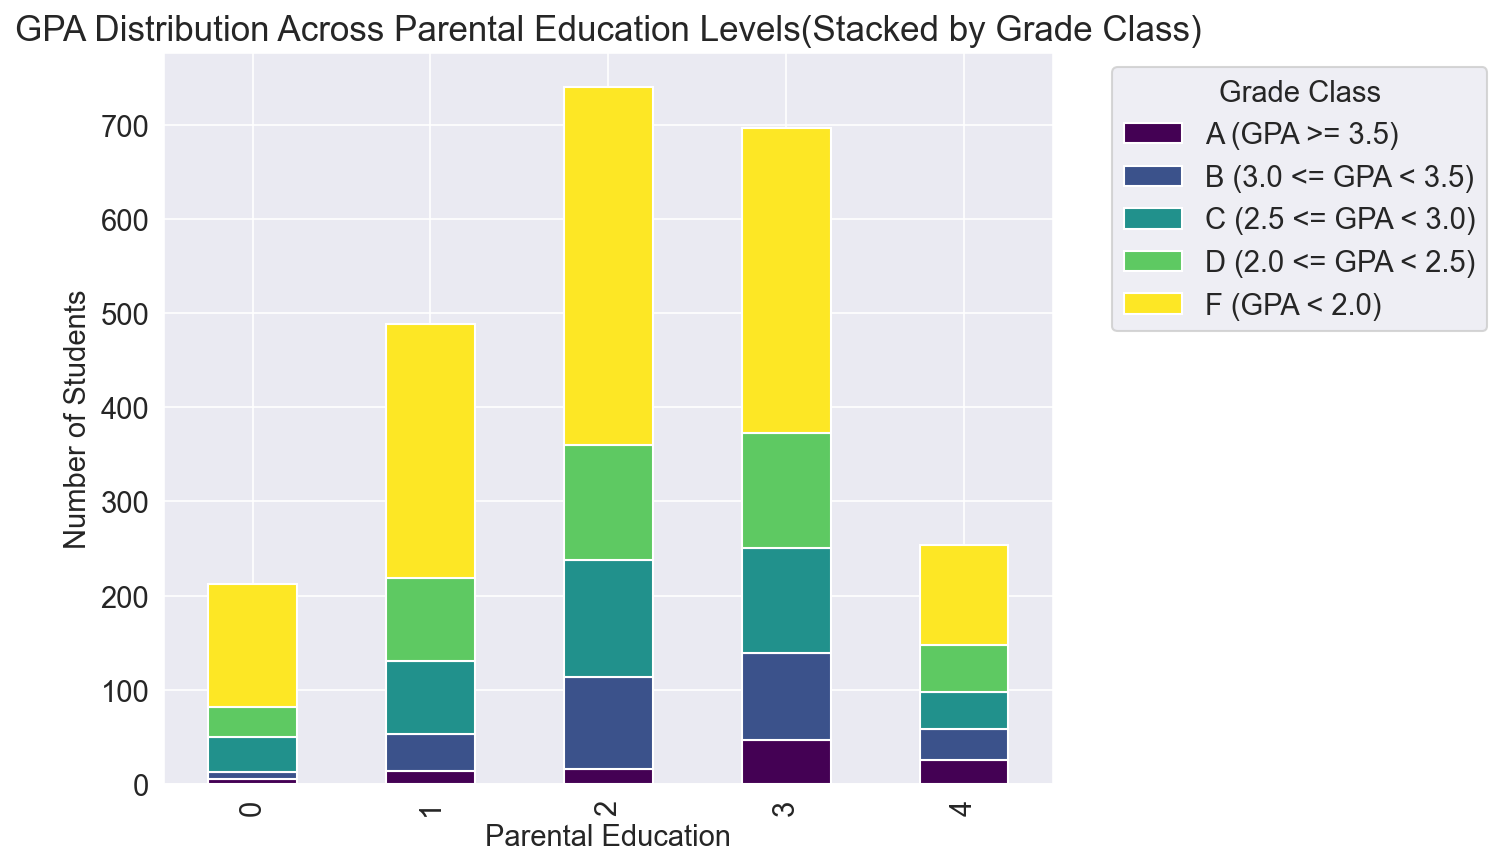

In [104]:
# Transpose to group by ethnicity on the x-axis
df_pe_agg_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("GPA Distribution Across Parental Education Levels(Stacked by Grade Class)")
plt.xlabel("Parental Education")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

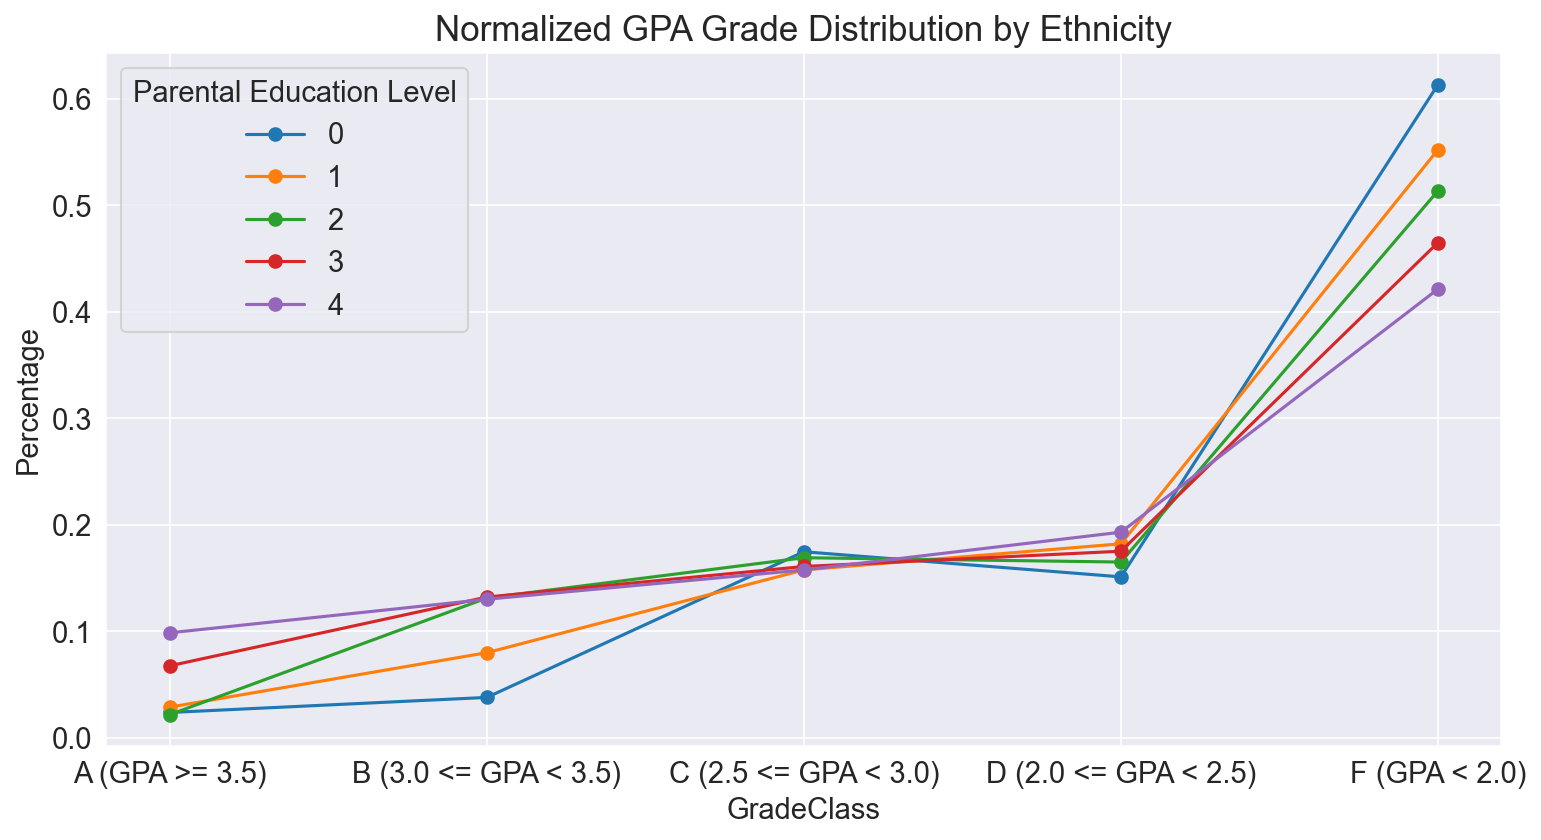

In [105]:
df_pe_normalized = df_pe_agg_T.div(df_pe_agg_T.sum(axis=1), axis=0)
# print(df_age_normalized)
# print(df_normalized['A (GPA >= 3.5)'].idxmax())
# print(df_normalized['A (GPA >= 3.5)'].idxmin())
plt.figure(figsize=(12, 6))

for i in df_pe_normalized.index:
    plt.plot(df_pe_normalized.columns, df_pe_normalized.loc[i],
             marker='o', label=i)

plt.title("Normalized GPA Grade Distribution by Ethnicity")
plt.xlabel('GradeClass')
plt.ylabel('Percentage')
plt.legend(title='Parental Education Level')
plt.savefig('Percentage Distribution of Ethnicities Across Grade Classes.png')
plt.show()


In [106]:
xlabel={'ParentalEducation':['None','High School','Some College', 'Bachelor\'s','Higher' ],
       'ParentalSupport':['None','low','Moderate', 'High','Very High' ]}

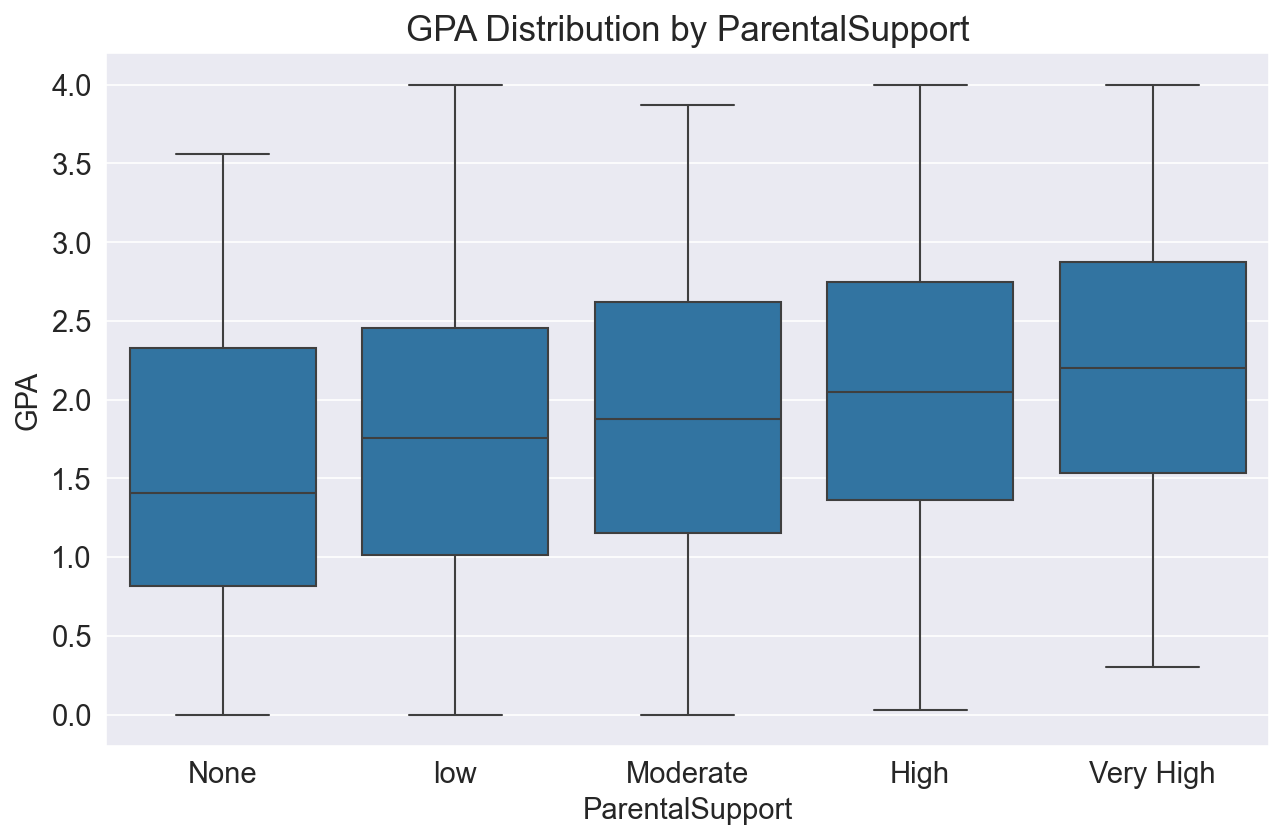

In [107]:
# fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for col in df_std_pfm[['ParentalSupport']]:
    sns.boxplot(x=df_std_pfm[col], y=df_std_pfm['GPA'])
    plt.title(f'GPA Distribution by {col}')
    plt.xlabel(col)
    
    # Custom x-axis labels
    if col != 'Age': 
        plt.gca().set_xticks(range(len(xlabel[col]))) 
        plt.gca().set_xticklabels(xlabel[col]) 

    plt.ylabel('GPA')
    plt.savefig(f'GPA Distribution by {col}.png')
    plt.show()
    

>The boxplots provide compelling evidence that parental support significantly enhances student GPA. As the level of parental support increases, the median GPA rises, the spread of GPAs narrows, and the overall distribution shifts toward higher GPAs. On the other hand, age and parental education level do not appear to significantly influence GPA distribution. The medians, interquartile ranges (IQRs), and overall ranges for these factors are quite similar, suggesting that age and parental education level may not have a strong impact on student GPAs within this dataset.


### Summary
The dataset provided valuable insights into the factors influencing student performance. Regular class attendance, participation in sports and music activities, receiving tutoring when needed, and having strong parental support all contribute positively to students' academic outcomes.